In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("COVID.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [4]:
data.shape

(950, 30)

In [5]:
data.head

<bound method NDFrame.head of     patientid  offset sex   age                   finding RT_PCR_positive  \
0           2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1           2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2           2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3           2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4           4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   
..        ...     ...  ..   ...                       ...             ...   
945       479     0.0   F  40.0                 Pneumonia             NaN   
946       479    70.0   F  40.0                 Pneumonia             NaN   
947       480     NaN   M  26.0                 Pneumonia             NaN   
948       481     NaN   M  50.0                 Pneumonia             NaN   
949       481     NaN   M  50.0                 Pneumonia             NaN   

    survival intubated intubation_present wen

In [11]:
data.isnull().sum()

patientid                   0
offset                    253
sex                        80
age                       237
finding                     0
RT_PCR_positive           357
survival                  589
intubated                 702
intubation_present        700
went_icu                  553
in_icu                    615
needed_supplemental_O2    860
extubated                 913
temperature               872
pO2_saturation            831
leukocyte_count           934
neutrophil_count          922
lymphocyte_count          910
view                        0
modality                    0
date                      289
location                   56
folder                      0
filename                    0
doi                       568
url                         0
license                   245
clinical_notes            182
other_notes               514
Unnamed: 29               945
dtype: int64

In [17]:
data.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,697.000000,713.000000,78.000000,119.000000,16.000000,28.000000,40.000000
mean,9.083214,53.534362,38.898718,78.475630,5.024375,5.307143,4.638050
std,31.664077,16.949007,6.494383,38.742573,2.660341,3.489956,20.550033
min,-360.000000,18.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,40.000000,37.800000,55.000000,3.067500,2.725000,0.746500
50%,5.000000,54.000000,38.150000,85.000000,4.745000,4.800000,1.100000
75%,10.000000,68.000000,38.975000,95.000000,6.857500,6.925000,1.600000
max,365.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


In [18]:
data.skew()

C:\Users\sankr\AppData\Local\Temp\ipykernel_21036\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


offset             -0.084034
age                -0.082536
temperature         8.583636
pO2_saturation      2.648394
leukocyte_count     0.457399
neutrophil_count    0.747759
lymphocyte_count    6.270249
dtype: float64

In [20]:
features = data.iloc[:,:-1].values
labels = data.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.2)

In [23]:
X_train.shape, Y_train.shape , X_test.shape , Y_test.shape

((760, 29), (760,), (190, 29), (190,))

In [27]:
data.corr()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
offset,1.000000,-0.001992,0.085304,0.164643,-0.156749,0.148430,-0.009622
age,-0.001992,1.000000,0.176245,-0.174707,0.492587,0.596002,0.528551
temperature,0.085304,0.176245,1.000000,-0.224417,0.119528,0.575253,-0.342545
pO2_saturation,0.164643,-0.174707,-0.224417,1.000000,-0.844946,0.226702,0.263767
leukocyte_count,-0.156749,0.492587,0.119528,-0.844946,1.000000,0.994478,-0.061150
neutrophil_count,0.148430,0.596002,0.575253,0.226702,0.994478,1.000000,0.039701
lymphocyte_count,-0.009622,0.528551,-0.342545,0.263767,-0.061150,0.039701,1.000000


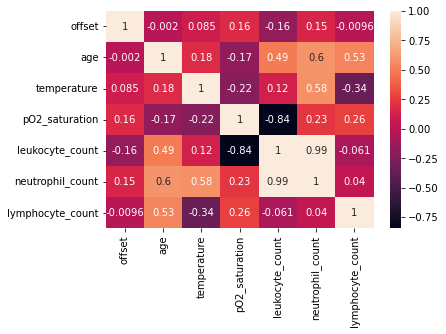

In [29]:
sns.heatmap(data.corr(),annot=True);

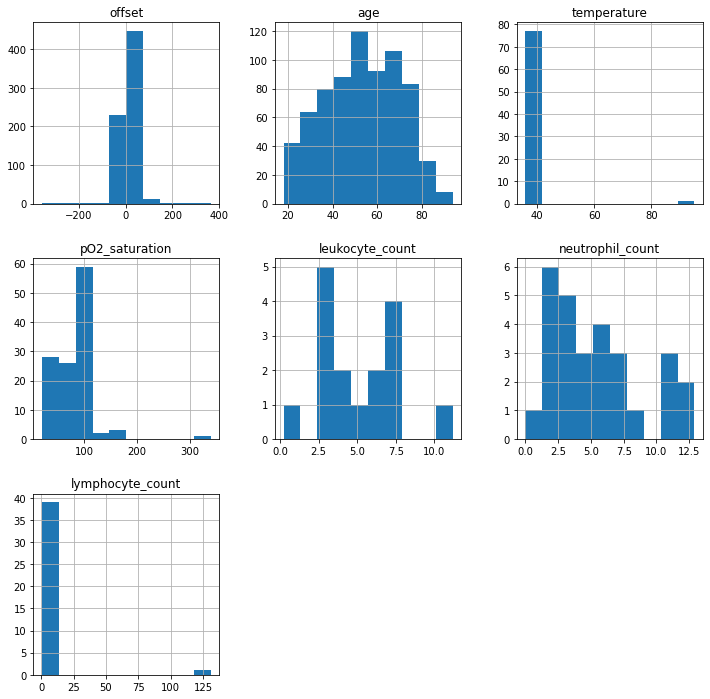

In [31]:
data.hist(figsize=(12,12),layout=(3,3),sharex=False);